In [1]:
import numpy as np
import pandas as pd



In [2]:
df_can = pd.read_excel('./Canda.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_can.shape

(195, 51)

In [7]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 46)


In [8]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


In [9]:
df_continents = df_can.groupby('Continent', axis=0).sum()

In [10]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,38543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,618948.0
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,155075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3317794.0
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,28691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1410947.0
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,765148.0
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,241142.0


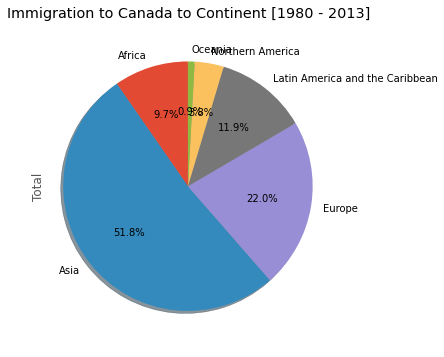

In [11]:
df_continents['Total'].plot(
    kind='pie',
    figsize=(5, 6),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title('Immigration to Canada to Continent [1980 - 2013]')
plt.axis('equal')
plt.show()

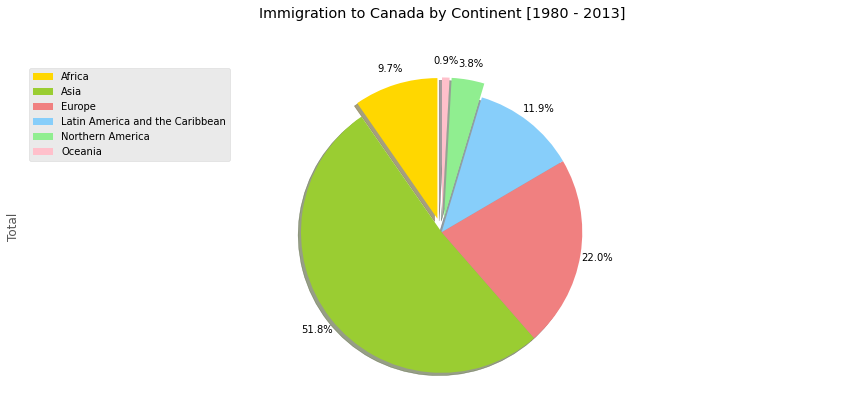

In [12]:
colors_list = [
    'gold', 'yellowgreen', 'lightcoral',
    'lightskyblue', 'lightgreen', 'pink'
]

explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    labels=None,
    pctdistance=1.12,
    colors=colors_list,
    explode=explode_list
)

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

<AxesSubplot:ylabel='2013'>

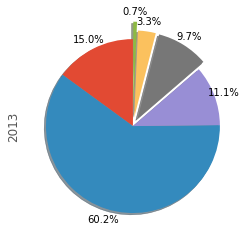

In [14]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]
df_continents['2013'].plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    labels=None,
    pctdistance=1.12,
    explode=explode_list
)

In [15]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


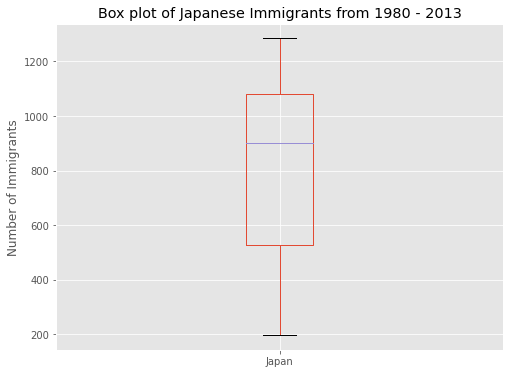

In [17]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [18]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [19]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [20]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


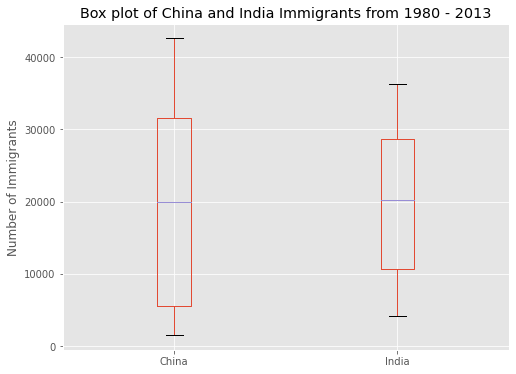

In [21]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China and India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

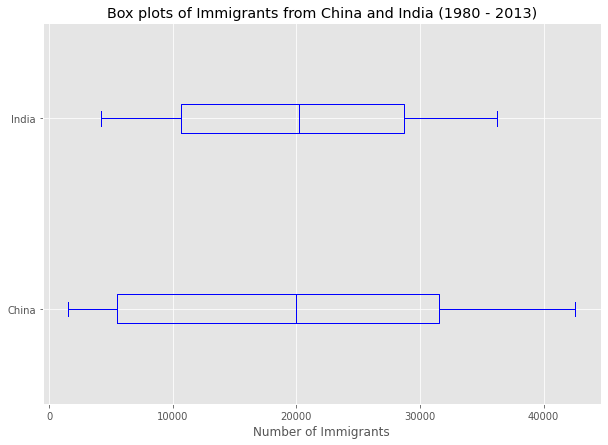

In [22]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

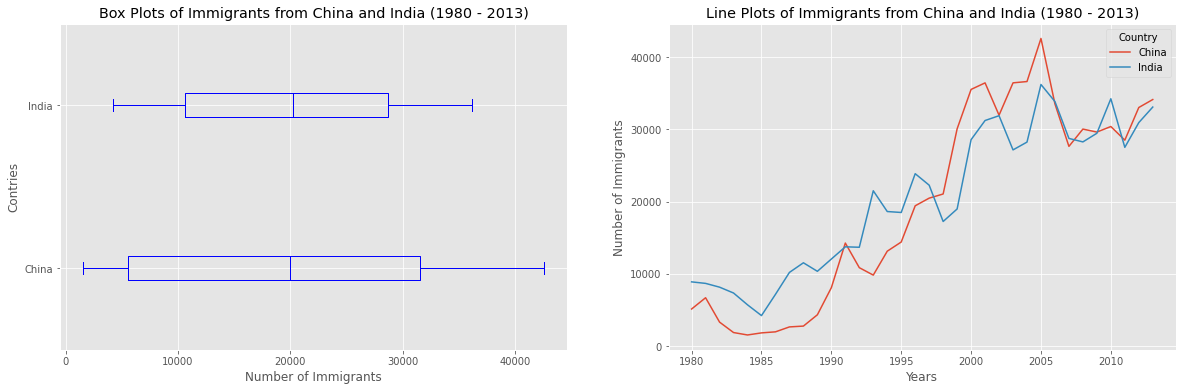

In [29]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Contries')

df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [30]:
df_scan = df_can.sort_values(['Total'], ascending=False)

In [31]:
df_top15 = df_scan.head(15)

In [32]:
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,33087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691904.0
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,34129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,5827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,29544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,12603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241600.0
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241122.0
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,11291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175923.0
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,2394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148358.0
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,4509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142581.0


In [33]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

In [34]:
new_df = pd.DataFrame({
    '1980s': df_80s,
    '1990s': df_90s,
    '2000s': df_00s
})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [36]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


<AxesSubplot:>

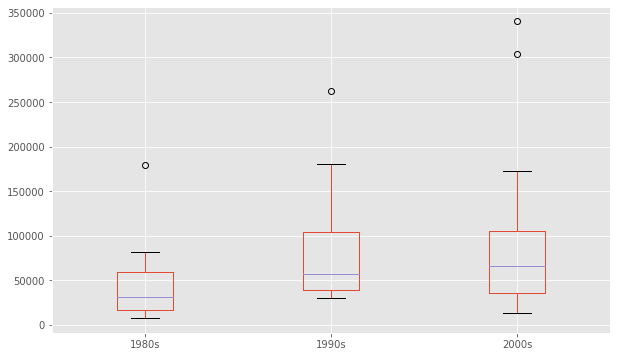

In [38]:
new_df.plot(kind='box', figsize=(10, 6))

In [41]:
q1 = 36101.500000
q3 = 105505.500000
iqr = q3 - q1

outlier = q3 + 1.5 * iqr
outlier

209611.5

In [42]:
new_df = new_df.reset_index()

In [43]:
new_df[new_df['2000s'] > outlier]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


In [49]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

df_tot = df_tot.reset_index()

df_tot.columns = ['year', 'total']

In [50]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


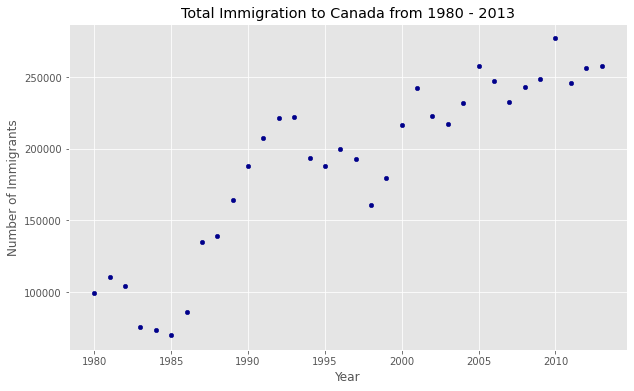

In [51]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [53]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

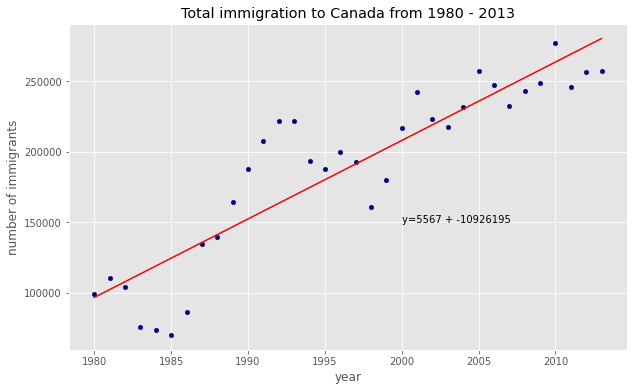

'No. Immigrants = 5567 * year + -10926195.245378'

In [60]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total immigration to Canada from 1980 - 2013')
plt.xlabel('year')
plt.ylabel('number of immigrants')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show();

'No. Immigrants = {0:.0f} * year + {1:0f}'.format(fit[0], fit[1])

In [75]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [76]:
df_countries

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


In [77]:
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [80]:
df_total = df_total.reset_index()

In [81]:
df_total.columns = ['year', 'total']

In [83]:
df_total['year'] = df_total['year'].astype(int)
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


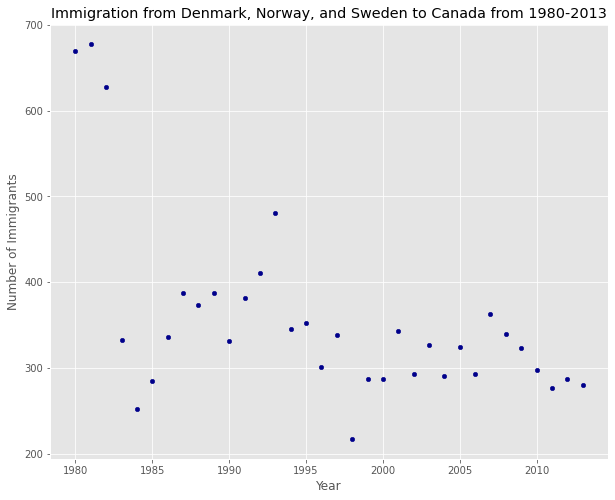

In [88]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 8), color='darkblue')

plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980-2013')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [91]:
df_can_t = df_can[years].transpose()

In [92]:
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'

df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [93]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

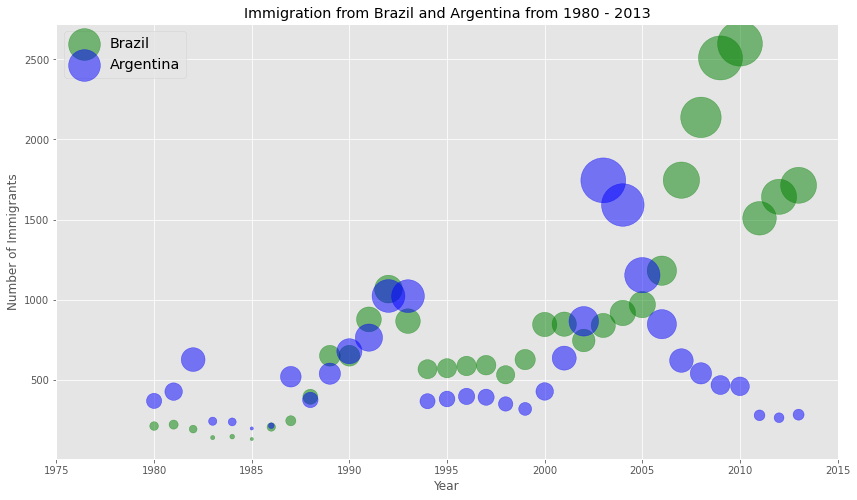

In [94]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [95]:
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())